In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('RELIANCE.NS.csv') #Loading the data

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-05,1440.049805,1465.112183,1433.610840,1446.934448,1441.521729,20723079.0
1,2020-05-06,1450.253052,1471.006348,1431.926758,1447.033569,1441.620483,18685710.0
2,2020-05-07,1441.337524,1499.436890,1431.431519,1492.799805,1487.215576,23087436.0
3,2020-05-08,1530.492432,1565.064697,1522.666626,1547.134766,1541.347290,38887255.0
4,2020-05-11,1565.163818,1599.835205,1557.536133,1561.993896,1556.150757,30959745.0


In [4]:
df = df.drop(['Open','High','Low','Adj Close','Volume'],axis=1) #we will focus on close data only, so drop others

In [5]:
df = df.set_index('Date')

In [6]:
df

,Close
Date,
2020-05-05,1446.934448
2020-05-06,1447.033569
2020-05-07,1492.799805
2020-05-08,1547.134766
2020-05-11,1561.993896
...,...
2021-04-29,2024.050049
2021-04-30,1994.500000
2021-05-03,1959.050049


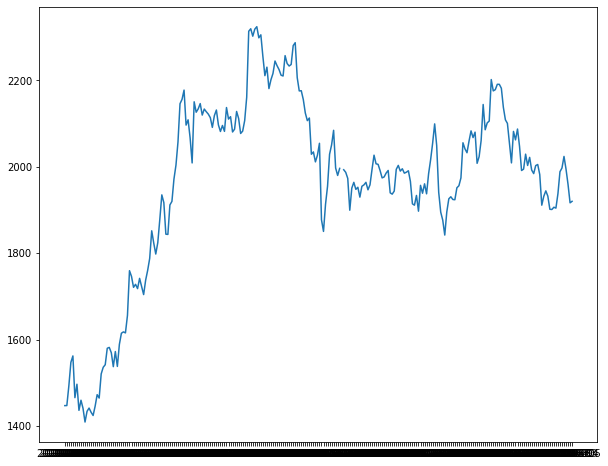

In [7]:
plt.figure(figsize=(10,8))
plt.plot(df)

In [8]:
df.isna().sum()

Close    1
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.isna().sum()

Close    0
dtype: int64

In [11]:
#Determing rolling statistics
rolmean = df.rolling(window=30).mean() 

rolstd = df.rolling(window=30).std()
print(rolmean, rolstd)

                  Close
Date                   
2020-05-05          NaN
2020-05-06          NaN
2020-05-07          NaN
2020-05-08          NaN
2020-05-11          NaN
...                 ...
2021-04-29  1994.715007
2021-04-30  1990.901677
2021-05-03  1986.183342
2021-05-04  1981.558337
2021-05-05  1978.591671

[251 rows x 1 columns]                 Close
Date                 
2020-05-05        NaN
2020-05-06        NaN
2020-05-07        NaN
2020-05-08        NaN
2020-05-11        NaN
...               ...
2021-04-29  61.331913
2021-04-30  57.419243
2021-05-03  53.795596
2021-05-04  53.608125
2021-05-05  54.486840

[251 rows x 1 columns]


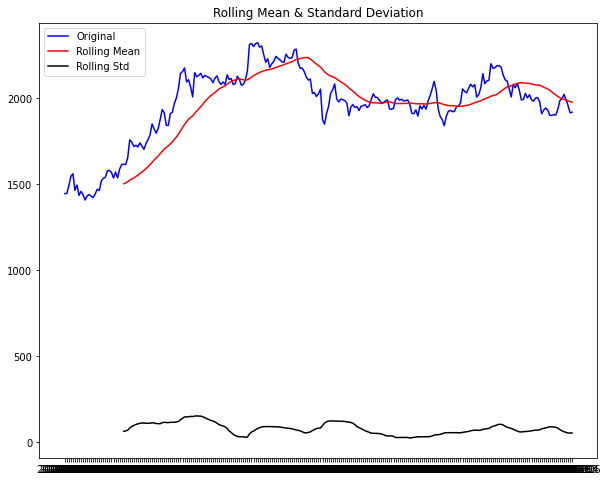

In [12]:
#Plot rolling statistics:
plt.figure(figsize=(10,8))
orig = plt.plot(df, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [13]:
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df['Close'], autolag='AIC') 

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -2.476591
p-value                          0.121274
#Lags Used                       0.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64


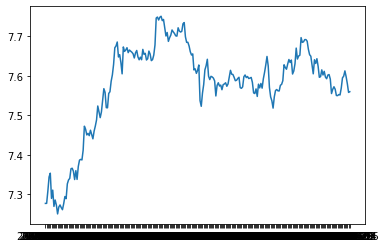

In [14]:
#Estimating trend
df_logScale = np.log(df)
plt.plot(df_logScale)

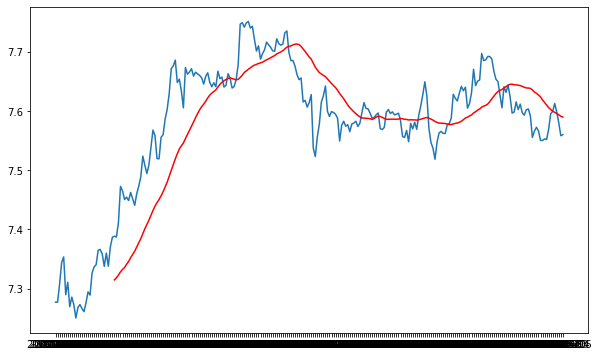

In [15]:
# moving average
plt.figure(figsize=(10,6))
movingAverage = df_logScale.rolling(window=30).mean()
movingSTD = df_logScale.rolling(window=30).std()
plt.plot(df_logScale)
plt.plot(movingAverage, color='red')


In [16]:
datasetLogScaleMinusMovingAverage = df_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)


#Remove Nan Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Close
Date,
2020-06-16,0.073912
2020-06-17,0.068788
2020-06-18,0.089087
2020-06-19,0.144238
2020-06-22,0.132645
2020-06-23,0.114849
2020-06-24,0.113387
2020-06-25,0.103012
2020-06-26,0.110308


In [17]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    movingAverage = timeseries.rolling(window=30).mean()
    movingSTD = timeseries.rolling(window=30).std()

    #Plot rolling statistics:
    plt.figure(figsize=(10,6))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['Close'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

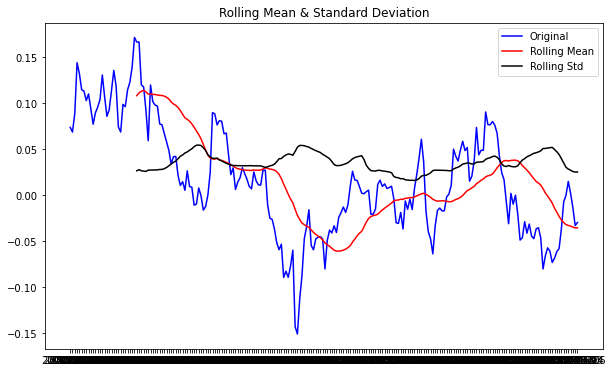

Results of Dickey-Fuller Test:
Test Statistic                  -2.424107
p-value                          0.135048
#Lags Used                       0.000000
Number of Observations Used    221.000000
Critical Value (1%)             -3.460291
Critical Value (5%)             -2.874709
Critical Value (10%)            -2.573789
dtype: float64


In [18]:
test_stationarity(datasetLogScaleMinusMovingAverage)

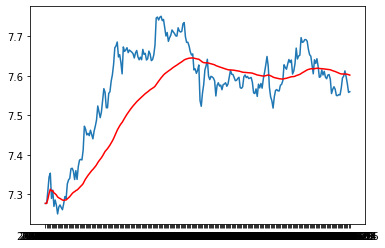

In [19]:
exponentialDecayWeightedAverage = df_logScale.ewm(halflife=30, min_periods=0, adjust=True).mean()
plt.plot(df_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

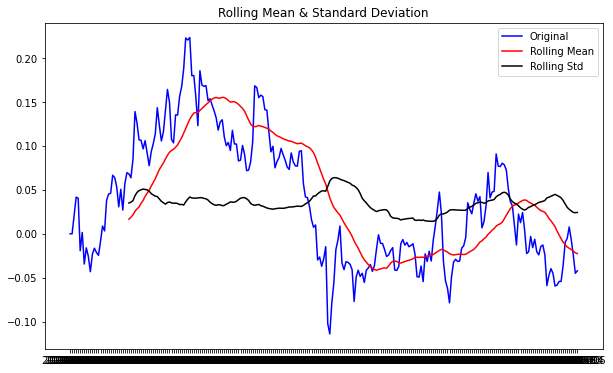

Results of Dickey-Fuller Test:
Test Statistic                  -2.024375
p-value                          0.275989
#Lags Used                       0.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64


In [20]:
datasetLogScaleMinusMovingExponentialDecayAverage = df_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

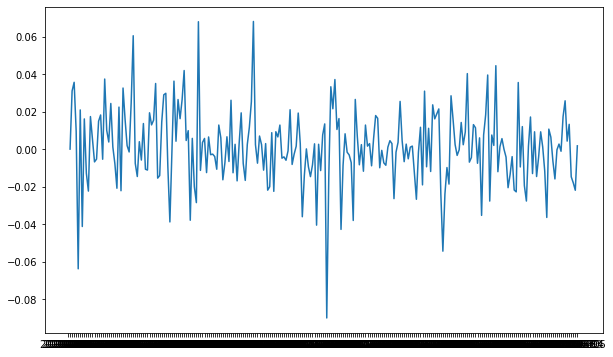

In [21]:
datasetLogDiffShifting = df_logScale - df_logScale.shift()
plt.figure(figsize=(10,6))
plt.plot(datasetLogDiffShifting)


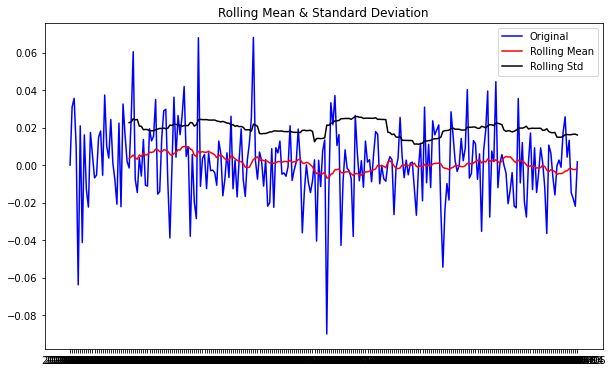

Results of Dickey-Fuller Test:
Test Statistic                -1.522433e+01
p-value                        5.430285e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.490000e+02
Critical Value (1%)           -3.456888e+00
Critical Value (5%)           -2.873219e+00
Critical Value (10%)          -2.572994e+00
dtype: float64


In [22]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

<ipython-input-23-bd0c54b6a769>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(df_logScale,freq=52)


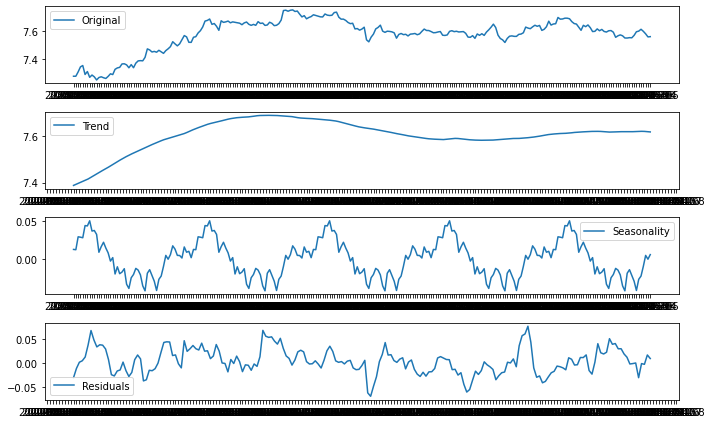

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_logScale,freq=52)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,6))
plt.subplot(411)
plt.plot(df_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()




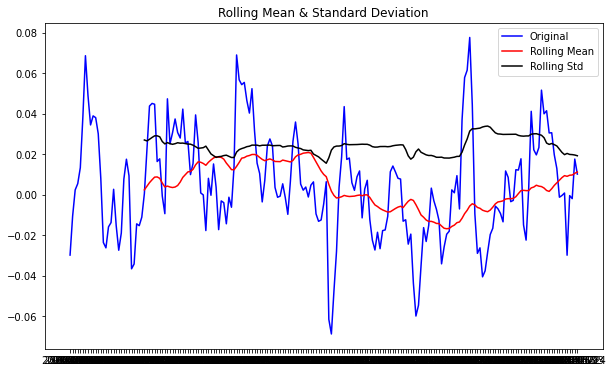

Results of Dickey-Fuller Test:
Successfully plotted


In [24]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
try:
    test_stationarity(decomposedLogData)
except:
    print('Successfully plotted')

In [25]:
#Perform Dickey-Fuller test:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(decomposedLogData, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -5.509309
p-value                          0.000002
#Lags Used                       1.000000
Number of Observations Used    197.000000
Critical Value (1%)             -3.463987
Critical Value (5%)             -2.876326
Critical Value (10%)            -2.574652
dtype: float64


c:\python38\lib\site-packages\statsmodels\tsa\stattools.py:665: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


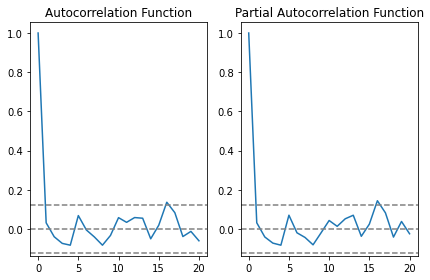

In [26]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf


lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')


#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

c:\python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will b

Plotting AR model


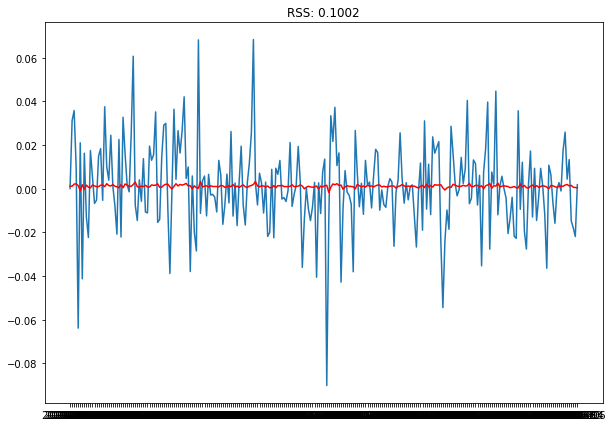

In [27]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(df_logScale, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)
plt.figure(figsize=(10,7))
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting['Close'])**2))
print('Plotting AR model')


c:\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Plotting AR model


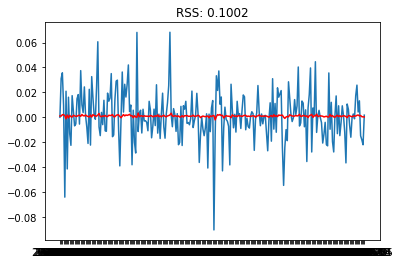

In [28]:
#MA MODEL
model = ARIMA(df_logScale, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting['Close'])**2))
print('Plotting AR model')

c:\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence

Text(0.5, 1.0, 'RSS: 0.0985')

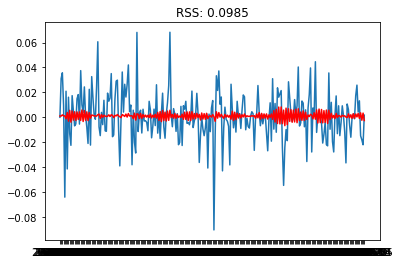

In [29]:
model = ARIMA(df_logScale, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['Close'])**2))

In [30]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2020-05-06    0.001129
2020-05-07    0.001098
2020-05-08    0.002057
2020-05-11    0.001290
2020-05-12    0.001238
dtype: float64


In [31]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2020-05-06    0.001129
2020-05-07    0.002227
2020-05-08    0.004284
2020-05-11    0.005574
2020-05-12    0.006812
dtype: float64


In [32]:
predictions_ARIMA_log = pd.Series(df_logScale['Close'][0], index=df_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2020-05-05    7.277202
2020-05-06    7.278331
2020-05-07    7.279429
2020-05-08    7.281487
2020-05-11    7.282776
dtype: float64

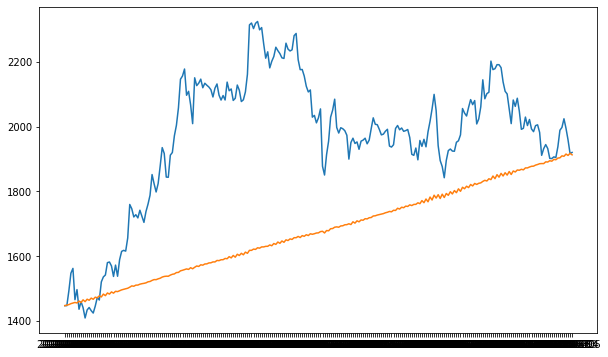

In [33]:
predictions_ARIMA= np.exp(predictions_ARIMA_log)
plt.figure(figsize=(10,6))
plt.plot(df)
plt.plot(predictions_ARIMA)

In [34]:
df_logScale

,Close
Date,
2020-05-05,7.277202
2020-05-06,7.277271
2020-05-07,7.308409
2020-05-08,7.344160
2020-05-11,7.353718
...,...
2021-04-29,7.612856
2021-04-30,7.598149
2021-05-03,7.580215


In [35]:
results_ARIMA.forecast(steps=60)

(array([7.56489273, 7.56260191, 7.56695153, 7.56504739, 7.56903284,
        7.56747165, 7.57113413, 7.56987711, 7.57325312, 7.57226589,
        7.57538783, 7.57463987, 7.57753647, 7.57700074, 7.57969746,
        7.57934996, 7.58186942, 7.58168886, 7.5840511 , 7.58401861,
        7.5862414 , 7.58634023, 7.58843934, 7.58865466, 7.59064407,
        7.59096269, 7.59285482, 7.59326506, 7.5950709 , 7.59556241,
        7.59729171, 7.5978553 , 7.59951672, 7.60014424, 7.60174546,
        7.60242967, 7.60397749, 7.60471199, 7.60621245, 7.60699156,
        7.60845001, 7.60926868, 7.61068988, 7.61154362, 7.61293178,
        7.61381665, 7.6151755 , 7.61608797, 7.61742083, 7.61835777,
        7.61966758, 7.62062624, 7.62191559, 7.62289351, 7.62416473,
        7.62515972, 7.62641486, 7.627425  , 7.62866587, 7.62968945]),
 array([0.01975186, 0.0287528 , 0.03492124, 0.04066282, 0.04526121,
        0.04980198, 0.05364171, 0.05750693, 0.06087771, 0.0642954 ,
        0.0673394 , 0.07043291, 0.07323219, 0.

c:\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
c:\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
c:\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


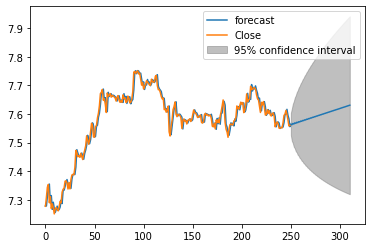

<Figure size 720x432 with 0 Axes>

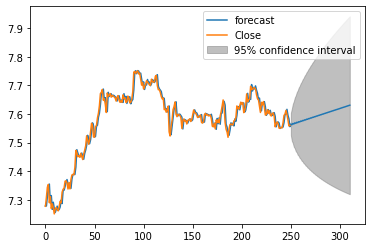

In [36]:
plt.figure(figsize=(10,6))
results_ARIMA.plot_predict(1,311)